In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

## Reading the data

In [14]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [15]:
df.shape

(51717, 17)

In [16]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Cleaning

### 1)Removing unncessary columns

#### We get rid of unnecessary columns to make it earier to work and understand the data. Below are the columns we have removed.

- "url" - has name of restaurant and location. We also have a name column and location columns. so we can drop url
- "reviews_list" -  has rating and customers reviews. we have a separate column for restaurant rating so we can drop review list column
- "phone" - column is also not required. We are not going to use phone number for our analysis and prediction
- "address" - We do not require the complete address of the restaurant. We only require area details and location.
- "dishes liked" -  is also not necessary for our predictions. we will base our predictions mainly on cuisines, location,rating.

In [18]:
df = df.drop(['url', 'address', 'phone',  'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


### 2)Adding new feature called No of items which tells the number of items in the menu and dropping menu column

The Menu column is not considered important in our current analysis because we are only focusing on analysing the prices, locations, votes and rating of different restaurants rather than the Menu. However the number of menu items helps our analysis if we consider if number of items in the menu impacts the performance of the restaurant 

In [19]:
(df['menu_item'].value_counts())

menu_item
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [20]:
def update_menu_items_number(menu):
    menu=menu.strip('[]').split(',')
    
    if len(menu)==1:
        if menu[0]=='':
            return 0
            
    return len(menu)
    
df['no_of_items'] = df['menu_item'].apply(update_menu_items_number)


drop menu_item column

In [21]:
df.drop(['menu_item'],axis=1,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),no_of_items
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,0
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,0
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,0
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,0


In [22]:
df['no_of_items'].unique()

array([  0,  33,  86,  12,  32, 150,  84,  66,  11,  19,  10,  56, 137,
       130,  18,   2,  36,  65, 222,  21,  20,  27,  93,  44,  53,  13,
       154, 104,  28,  14,  47,   6,  26,  29,  39,  41, 147,  15,  67,
        24, 181,  80,  76,  45,  31,  68,   9,  51,  57, 368,  97,  85,
       133,  88,  43, 192,  25,  49, 138, 114,  70, 112,  17,  83,  61,
       158, 117, 271, 216, 273, 141, 124, 109,  92,  94, 144, 210, 119,
       128,  78, 295, 172, 122,  74,  22, 162,  30,  37,   5,  96, 176,
       100,  62,  60,  23,  75, 127,  58,  63, 149, 268,  82, 173, 214,
       213, 285, 231, 123, 314,  48, 277,  50, 152,  77,  42,  40,  52,
       151,  54, 116, 408, 389, 242, 455, 101, 177, 145,  73, 107, 125,
        90, 126, 142, 121, 132, 183, 196, 166, 129, 203, 143, 392, 448,
       257, 169, 220, 157, 182,  95, 199, 161, 113, 204,  81, 165, 394,
       301,  91, 224, 243, 202, 155,   1, 361, 398, 439, 102,  79, 163,
       221, 246, 131,  16, 235,  38, 153,  99,  71, 146, 111, 18

3)Renaming columns names

#### We rename the names of the following columns to make it easier to read and understand

- "approx_cost(for two people)" to "cost"
- "listed_in(type)" to "type"
- "listed_in(city)" to "city"

In [23]:
df.rename(columns={"approx_cost(for two people)":"cost","listed_in(type)":"type","listed_in(city)":"city"},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city,no_of_items
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,0
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,0
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,0
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,0


### 4) removing duplicates
#### We will find the duplicates in the data

Removing duplicates is important in data cleaning to make it accurate and trustworthy. It ensures that you're not counting the same thing twice, making your analysis more reliable, faster, and easier to understand.

In [24]:
df.drop_duplicates(inplace = True)
df.shape

(51630, 12)

### 5) Removing null values

Null values represents missing or undefined information can cause errors in analyses or machine learning models. By getting rid of these we ensure that the data is reliable, making it easier to draw meaningful conclusions and avoid mistakes.

In [25]:
df.dropna(inplace = True)

### 6) Exploring rate column

Changing the "rate" column to a float is important because it allows us to use the numbers in mathematical operations and analyses.

In [26]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

- if rating is NEW or - we assume its a new and give it null value
- remove '/5' and converting to float

In [27]:
def update_ratings(rating):
    if(rating=='NEW' or rating=='-'):
        return np.nan
    else:
        rating = str(rating).split('/')[0]
        return float(rating)
    
df['rate'] = df['rate'].apply(update_ratings)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

#### checking if all rates are within 0-5 
##### Outlier checking
Checking for outliers in the rating feature may not make sense when the ratings are on a fixed scale from 0 to 5 because outliers typically imply values that are unusually high or low compared to the majority of the data. 
In the context of ratings, any value outside the range of 0 to 5 would be incorrect or invalid.
So we are checking for minimum and maximum rating value

In [28]:
print(df['rate'].min())
print(df['rate'].max())

1.8
4.9


### Removing null values in rating

Since we changed the rating values to Null if the values were "NEW" or "-", we will remove the null values again

In [29]:
df.dropna(inplace = True)

### 7)changing cost column to float data type

Similar to rate, the cost column (average cost of two people) should be changed to float because its not a categorical data and we need to perform statistical analysis on the cost.

- cost is of object data type. We convert it to float, by removing commas

In [30]:
df["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [31]:
# replce comma with empty string in cost column
df["cost"]=df["cost"].astype(str).apply(lambda x: x.replace(",","")).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41205 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41205 non-null  object 
 1   online_order  41205 non-null  object 
 2   book_table    41205 non-null  object 
 3   rate          41205 non-null  float64
 4   votes         41205 non-null  int64  
 5   location      41205 non-null  object 
 6   rest_type     41205 non-null  object 
 7   cuisines      41205 non-null  object 
 8   cost          41205 non-null  float64
 9   type          41205 non-null  object 
 10  city          41205 non-null  object 
 11  no_of_items   41205 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 4.1+ MB


### 8)checking for outliers in cost.
We are checking if there are abnormal values or errors in the cost.

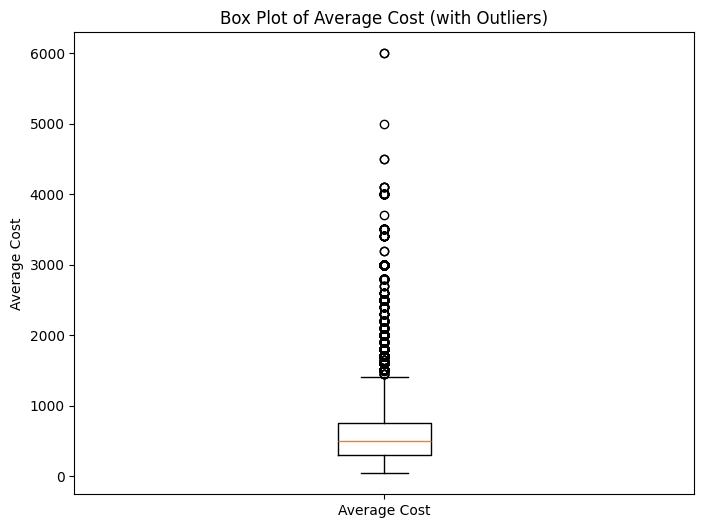

In [32]:


# Calculate the IQR (Interquartile Range)
Q1 = df['cost'].quantile(0.25)
Q3 = df['cost'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['cost'] < lower_bound) | (df['cost'] > upper_bound)]


# Create a box plot to visualize the outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['cost'])
plt.title("Box Plot of Average Cost (with Outliers)")
plt.ylabel("Average Cost")
plt.xticks([1], ['Average Cost'])
plt.show()


We arent removing the outliers in the cost data, even if visible in a box plot, because these extreme values may be legitimate and meaningful. They represent valid high-cost items or services.
We do not find unrealistically high values as shown below

In [33]:
print(df['cost'].min())
print(df['cost'].max())

40.0
6000.0


############ 

### 7) checking on location column

In [34]:
location_counts=df['location'].value_counts()
print(location_counts)

location
BTM                      3873
Koramangala 5th Block    2295
HSR                      1992
Indiranagar              1795
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: count, Length: 92, dtype: int64


##### If a particular location has less than 100 restaurant, we will change he location to 'others'

In [35]:
def update_location(location):
    if location_counts[location]<300:
        return "others"
    else:
        return str(location)
    
df['location'] = df['location'].apply(update_location)
    

### 8) checking restaurant type (rest_type)

In [36]:
rest_type_counts=df['rest_type'].value_counts()


##### If there are less than 100 restaurants of a particular type we will put that restaurant's rest_type as 'others'

In [37]:
def update_rest_type(rest_type):
    if rest_type_counts[rest_type]<100:
        return "others"
    else:
        return str(rest_type)
    
df['rest_type'] = df['rest_type'].apply(update_rest_type)

### 9) Checking cuisines columns

In [38]:
cuisines_count=df['cuisines'].value_counts()
print(cuisines_count)

cuisines
North Indian                                2107
North Indian, Chinese                       1949
South Indian                                1231
Cafe                                         620
Bakery, Desserts                             613
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2367, dtype: int64


##### if a particular cuisine type has less than 100 restaurant, then we change the cuisine type as others

In [39]:
def update_cuisines(cuisine):
    if cuisines_count[cuisine]<100:
        return "others"
    
    else:
        return str(cuisine)
    
df['cuisines']=df['cuisines'].apply(update_cuisines)

# EDA

In [40]:
# df.head()
df['votes'].unique

<bound method Series.unique of 0        775
1        787
2        918
3         88
4        166
        ... 
51709     34
51711     81
51712     27
51715    236
51716     13
Name: votes, Length: 41205, dtype: int64>

### 1) number of restaurants in each location

Counting the number of restaurants in each location is important because it helps us understand where people prefer to open or visit restaurants. It gives us insights into the popularity of different areas for dining. This information is valuable for both restaurant owners and customers. For owners, it guides them in choosing strategic locations. For customers, it helps them know where they have more dining options and diverse food experiences

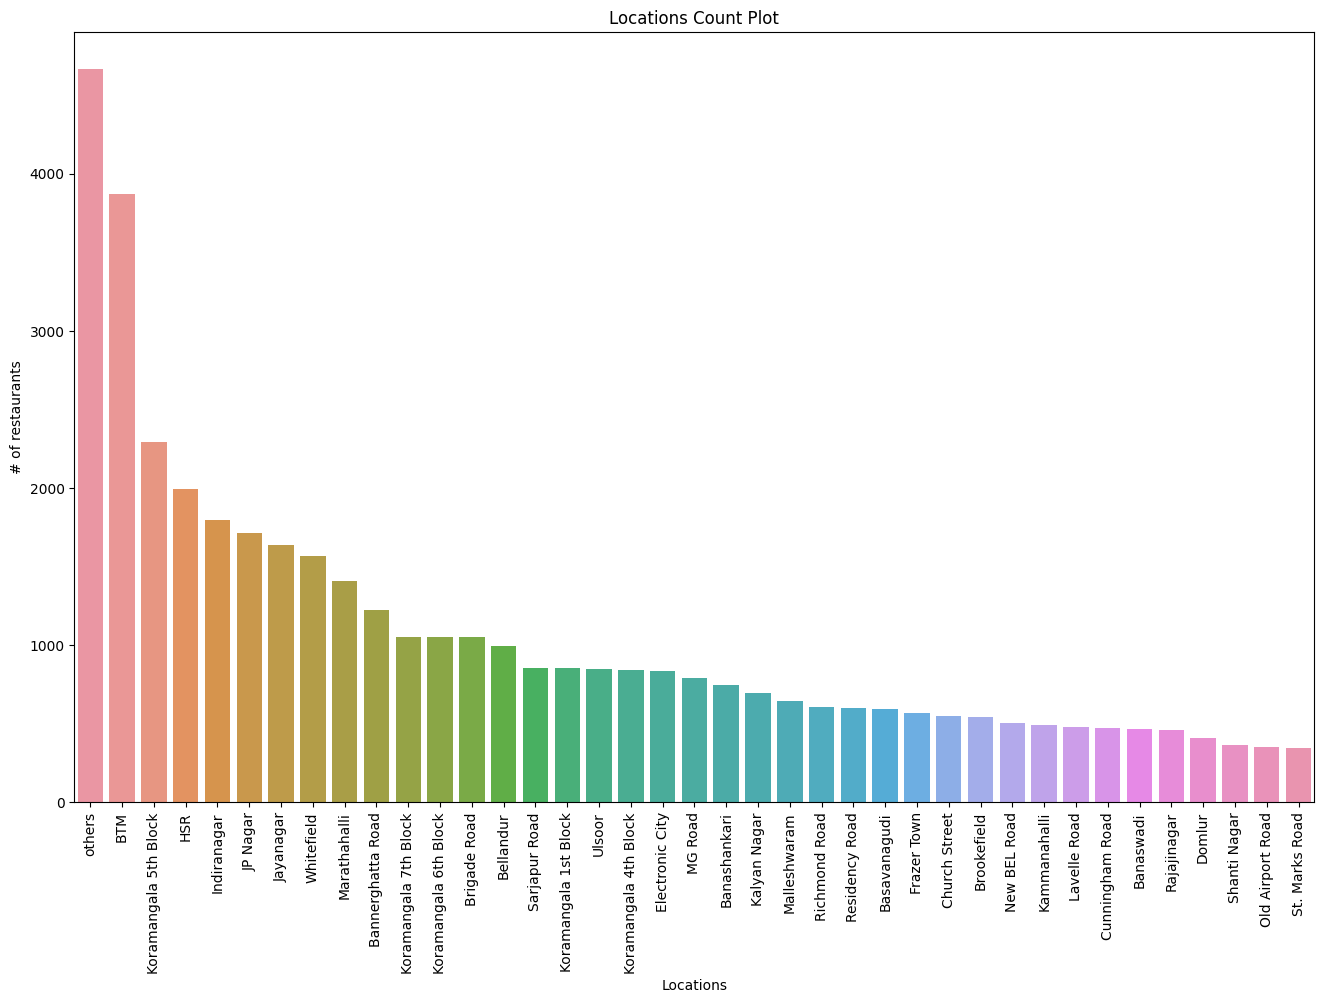

In [41]:
# Create a count plot
plt.figure(figsize = (16,10))
sns.color_palette("hls", 8)
sns.countplot(x=df['location'],order=df['location'].value_counts().index)

# Set labels and title

plt.xlabel("Locations")
plt.ylabel("# of restaurants")
plt.title("Locations Count Plot")
plt.xticks(rotation=90)

# Show the plot

plt.show()

### 2) Number of restaurants vs cuisine

Creating a graph that shows the number of restaurants for each cuisine is important because it reveals which types of food are most popular overall.

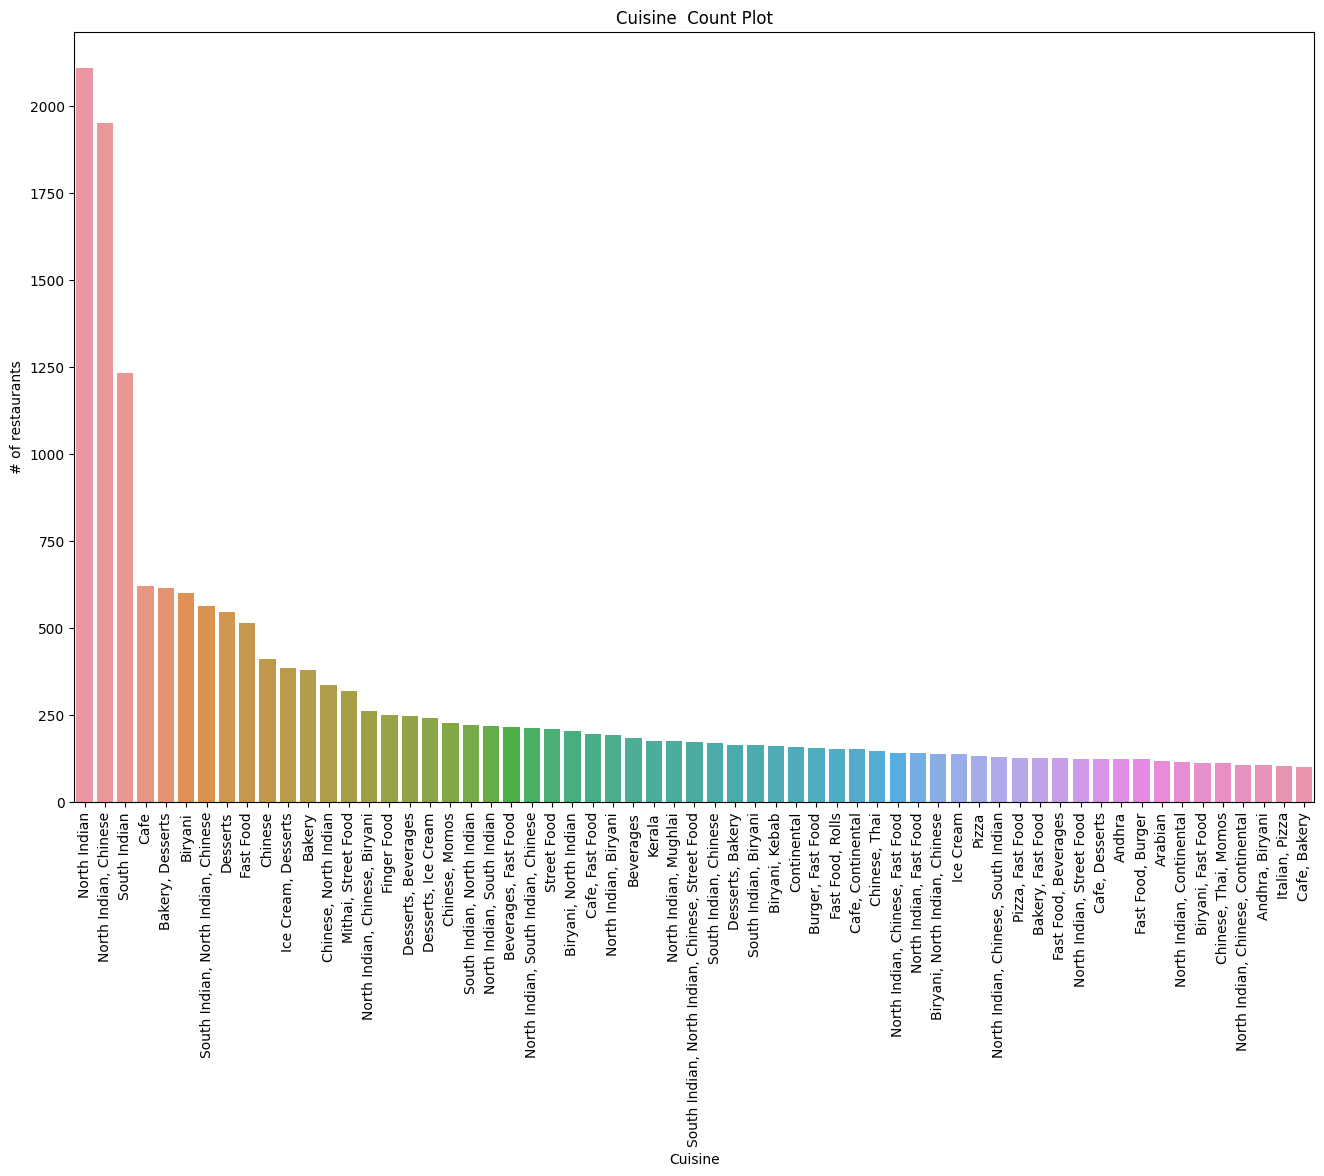

In [42]:
# Exclude a cuisines category others 
cuisines_data=df['cuisines']
filtered_cuisines_data = cuisines_data[cuisines_data != "others"]


# Create a count plot
plt.figure(figsize = (16,10))
sns.countplot(x=filtered_cuisines_data,order=filtered_cuisines_data.value_counts().index)

# Set labels and title
plt.xlabel("Cuisine")
plt.ylabel("# of restaurants")
plt.title("Cuisine  Count Plot")
plt.xticks(rotation=90)

# Show the plot
plt.show()

## 3.1) Count plot of online_order

The graph tells us that online orders are becoming more and more popular. The number of restaurants with online orders is nearly double the number of restaurants without online orders. This means that more and more people are choosing to order food online, rather than going to a restaurant in person.

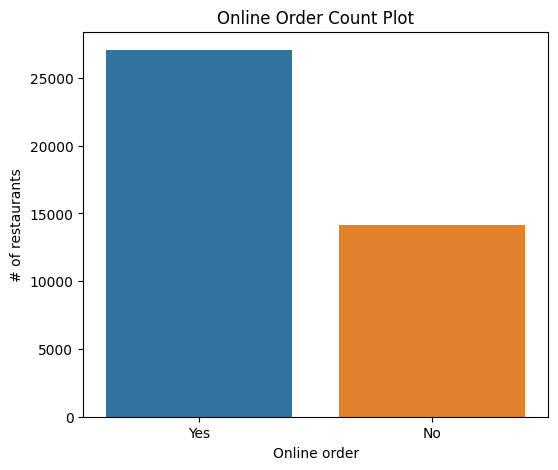

In [43]:
# Create a count plot
plt.figure(figsize = (6,5))
sns.countplot(data=df,x='online_order' )

# Set labels and title
plt.xlabel("Online order")
plt.ylabel("# of restaurants")
plt.title("Online Order Count Plot")

# Show the plot
plt.show()

## 3.2) Pie plot of online orders

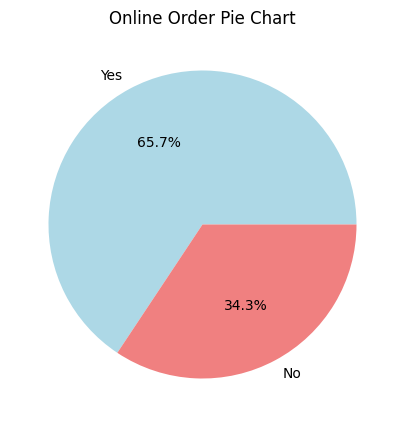

In [44]:
# Calculate the counts of each category
counts = df['online_order'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Online Order Pie Chart")

plt.show()

## 4) Count plot of book_table

This graph shows that most restaurants dont allow customers to book tables.

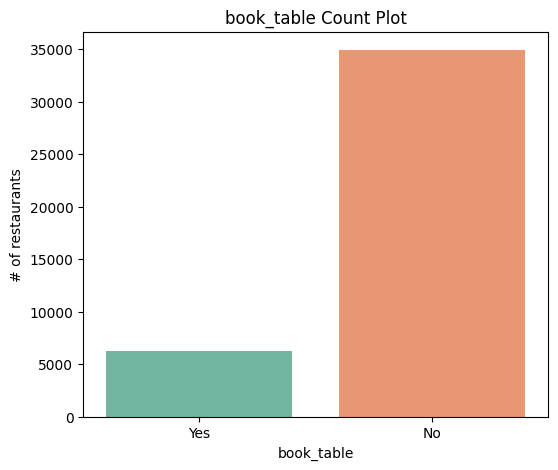

In [45]:
# Create a count plot
plt.figure(figsize = (6,5))
sns.countplot(x=df['book_table'], palette="Set2")

# Set labels and title
plt.xlabel("book_table")
plt.ylabel("# of restaurants")
plt.title("book_table Count Plot")

# Show the plot
plt.show()

## 5) count plot of type

This graph show which type of meal is popular amonf restaurants. Graph shows that delivery restaurants are more popular than other types of restaurants. It shows that people are increasingly choosing to have their food delivered to them, rather than going to a restaurant in person. This is likely due to a number of factors, such as convenience, affordability, and the wide variety of delivery options available.

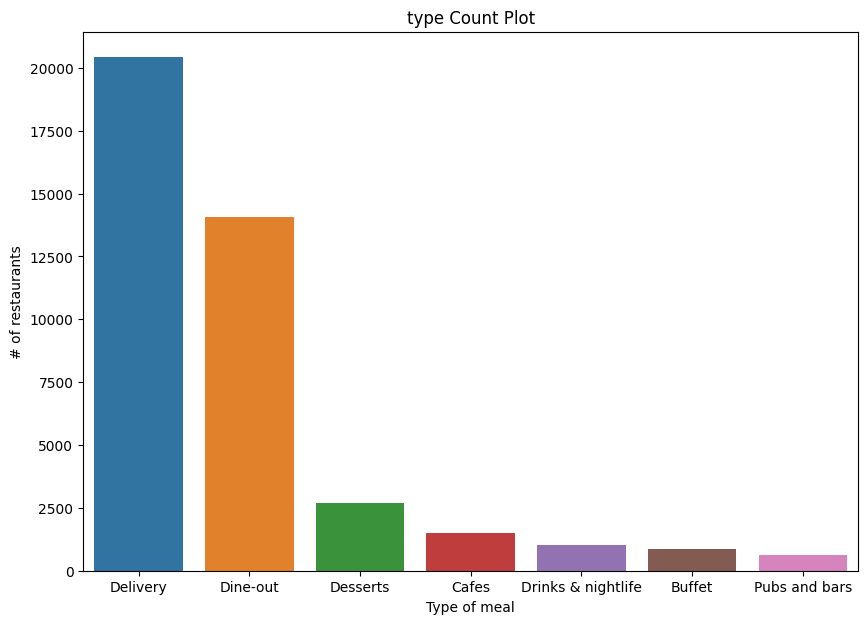

In [46]:
# Create a count plot
plt.figure(figsize = (10,7))
sns.countplot(x='type',data=df,order=df['type'].value_counts().index)

# Set labels and title
plt.xlabel("Type of meal")
plt.ylabel("# of restaurants")
plt.title("type Count Plot")


# Show the plot
plt.show()

## 6) Rate vs type

This plot shows the relationship between the average rating of a restaurant and the type of meal. This graph shows that 'Drinks & nightlife' and 'Pubs and bars' have the highest avg ratings followed by buffets. Delevery has the lowest rating.

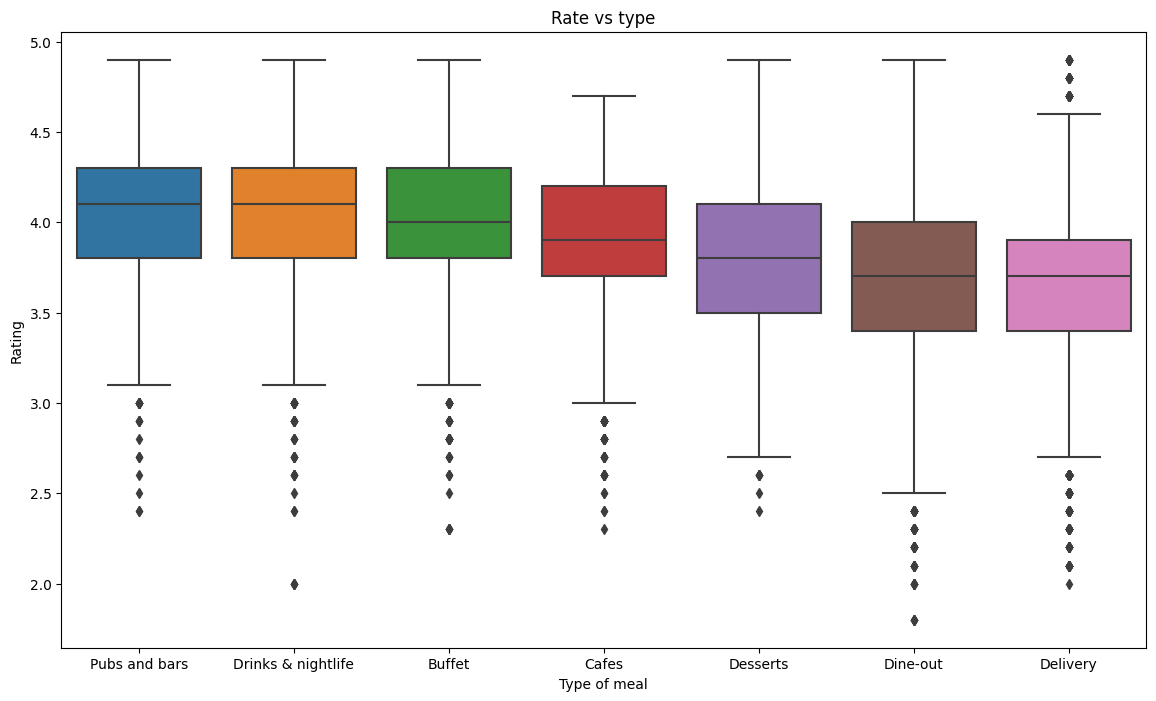

In [47]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'type', y = 'rate', data = df,order=df.groupby('type')['rate'].mean().sort_values(ascending=False).index)


# Set labels and title
plt.xlabel("Type of meal")
plt.ylabel("Rating")
plt.title('Rate vs type')
plt.show()

## 7) Rate vs online order

This graph shows the relationship between the average rating of a restaurant and the online order option. The average rating is higher for restaurants with online order options than for restaurants without online order options. This means that customers tend to rate restaurants with online order options more highly.

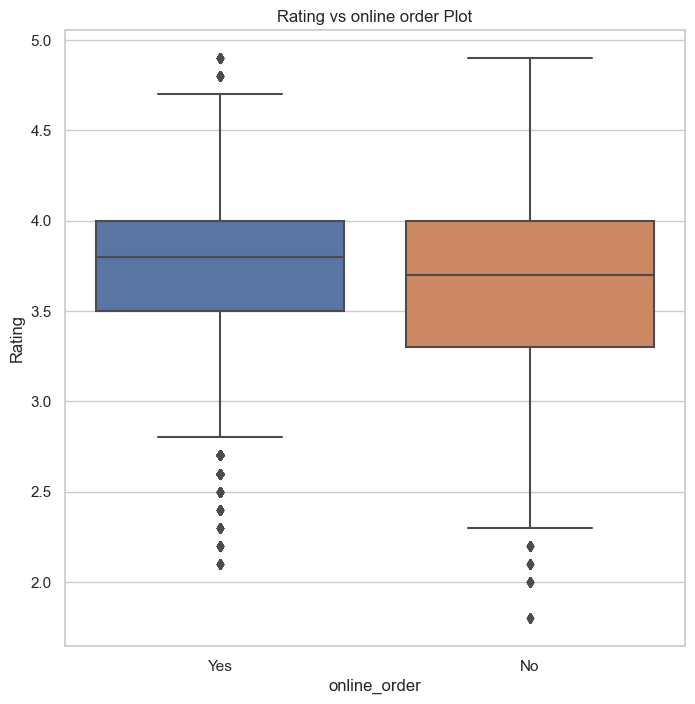

In [48]:
plt.figure(figsize = (8,8))
sns.set(style="whitegrid")
sns.boxplot(x = 'online_order',data=df, y = df['rate'])



# Set labels and title
plt.xlabel("online_order")
plt.ylabel("Rating")
plt.title("Rating vs online order Plot")
plt.show()

## 8) Rate vs book_table

This graph shows the relationship between the average rating of restaurants and the table booking option. The average rating is higher for restaurants with allows table booking than restaurants that dont allow table booking. This means that customers tend to rate restaurants with tabel booking option more highly.




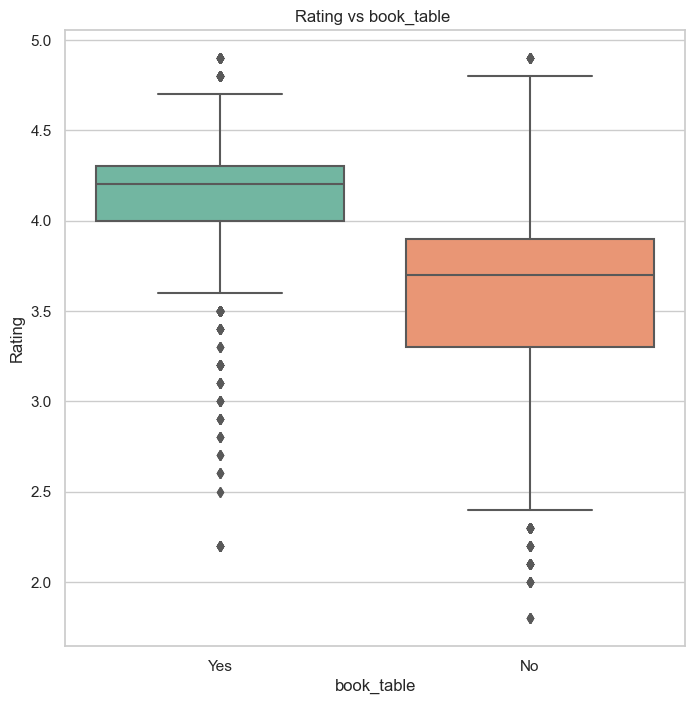

In [49]:
plt.figure(figsize = (8,8))
sns.set(style="whitegrid")
sns.boxplot(x = df['book_table'], y = df['rate'],palette="Set2")



# Set labels and title
plt.xlabel("book_table")
plt.ylabel("Rating")
plt.title("Rating vs book_table ")
plt.show()

## 9) Count of restaurants based on location and online order

This graph shows the number of restaurants that not allow/allow online order in each location. We can infer each area has more has more restuarants that allow online ordering than non-online ordering resstaurants. This shows the trend that people prefer online order for its comfort, ease of availability and restaurant owners are following the pattern.

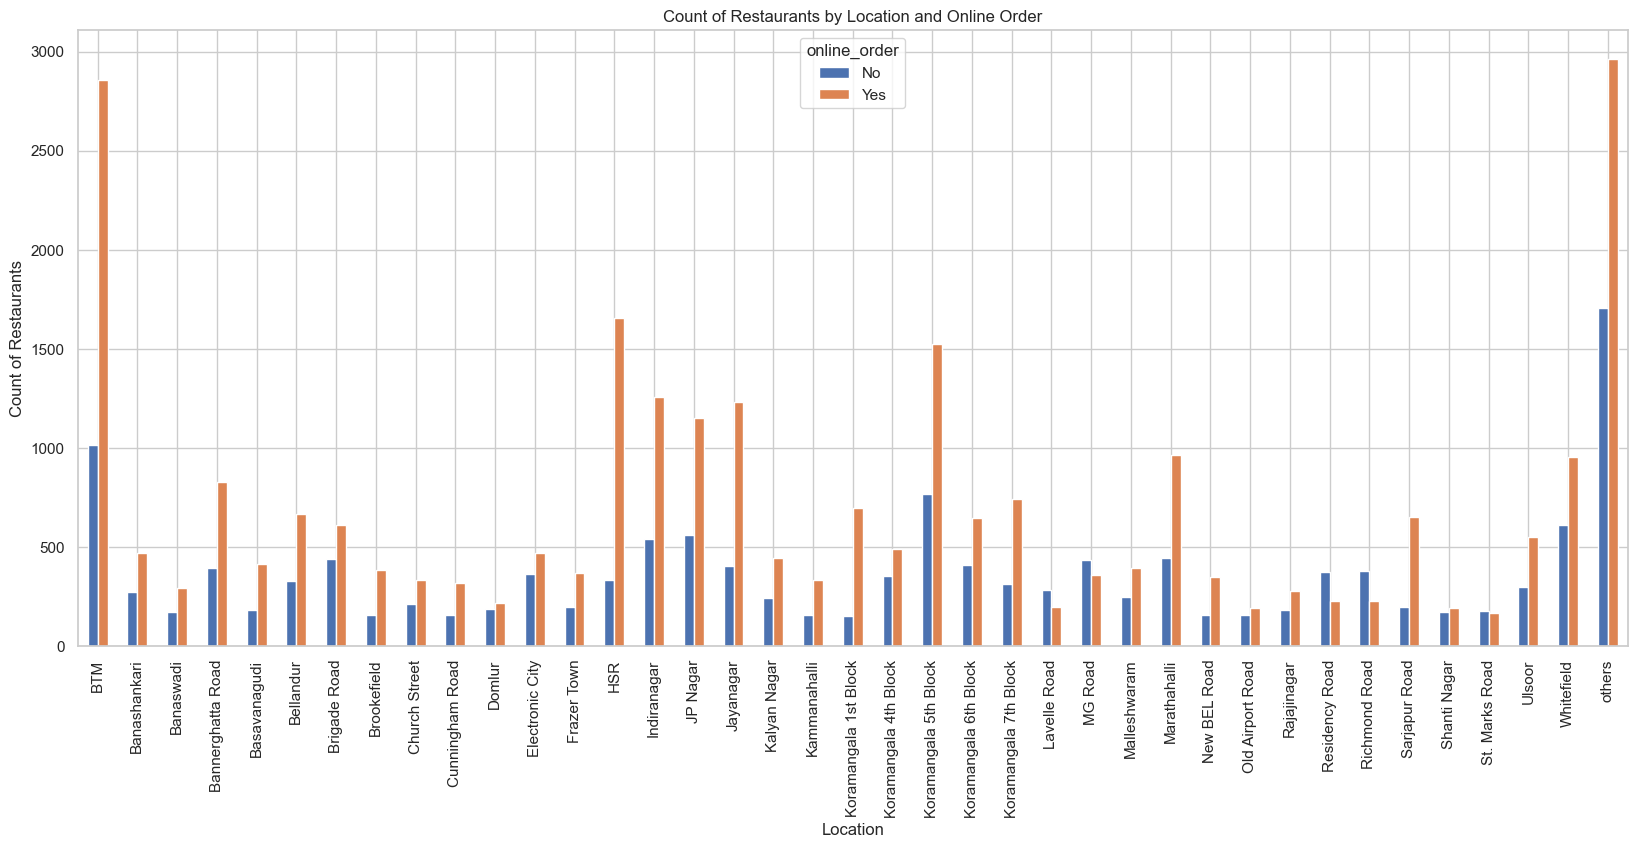

In [50]:
# Create a pivot table
df1 = df.pivot_table(index='location', columns='online_order', values='name', aggfunc='count', fill_value=0)

# Plot the bar chart
df1.plot(kind='bar', figsize=(20, 8))
plt.title("Count of Restaurants by Location and Online Order")
plt.xlabel("Location")
plt.ylabel("Count of Restaurants")
plt.show()

## 10) Avg cost of restaurant based on location

This graph shows the avg cost of restaurants in each location. It shows Lavelle road and MG road have most expensive restaurants while BTM and Basvangudi has the cheapest Restaurants on average

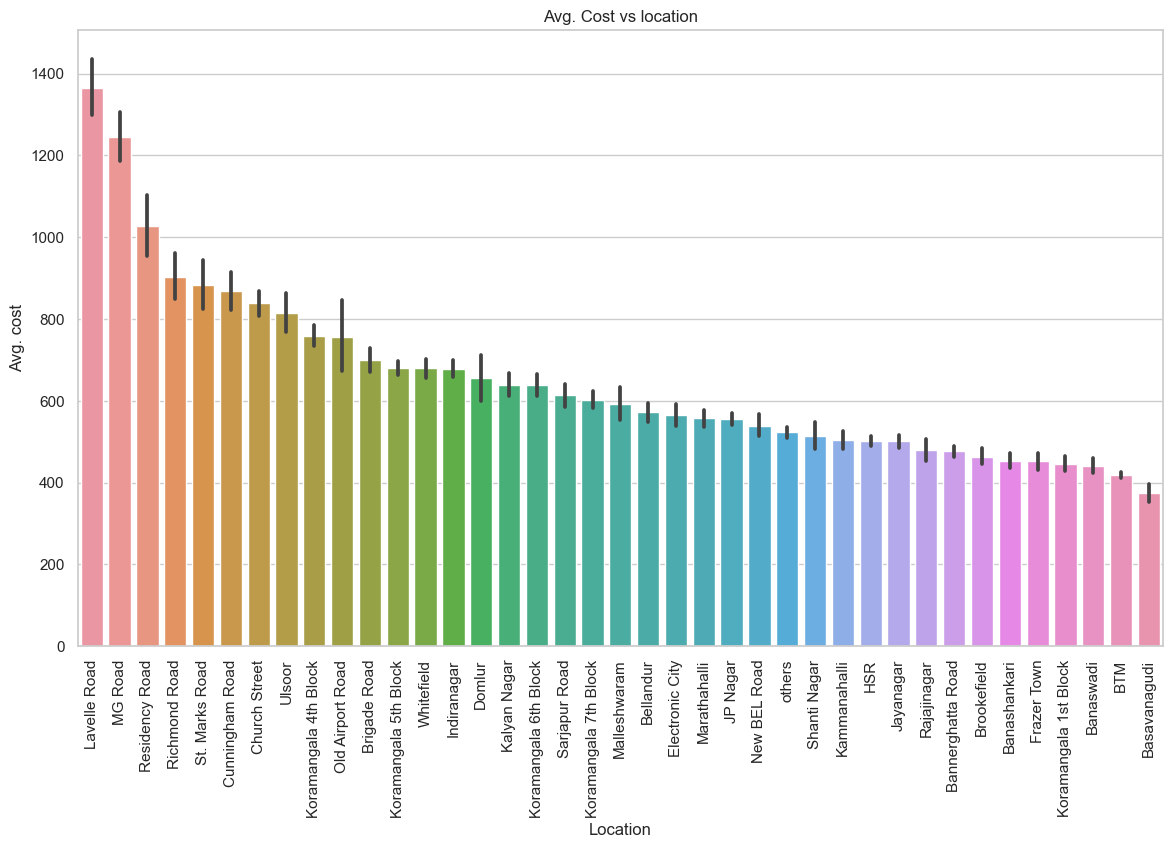

In [51]:
plt.figure(figsize = (14, 8))
sns.barplot(x = 'location', y = 'cost', data = df,order=df.groupby('location')['cost'].mean().sort_values(ascending=False).index)



plt.title("Avg. costby Location and Online Order")
plt.xlabel("Location")
plt.ylabel("Avg. cost")
plt.title('Avg. Cost vs location')
plt.xticks(rotation = 90)
plt.show()

## 11) avg cost of restaurant based on location and order type

This graph shows the Avg. cost of restaurants by location and order type. The graph shows any area has similar cost that do and do not offer online order.
Also in locations like airport Road, Ulsoor, Residency Road have non online ordering restaurants that are on average way more expensive than online ordering restaurants.

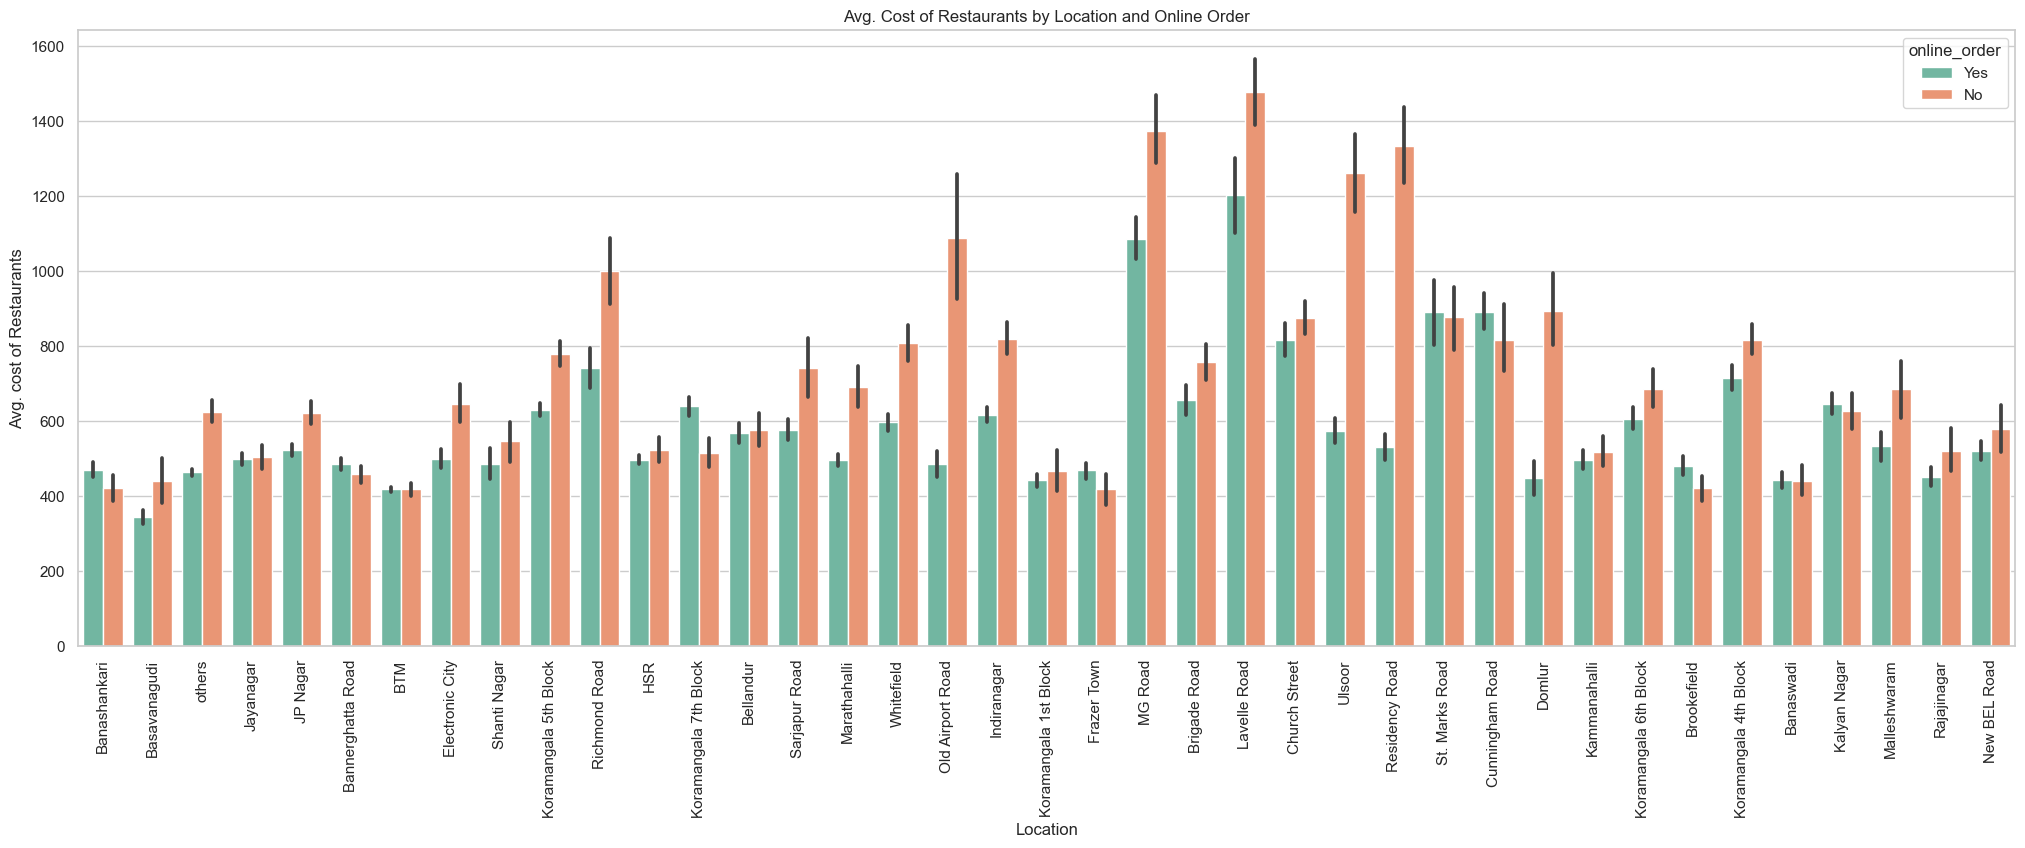

In [52]:
plt.figure(figsize = (25, 8))
sns.barplot(x = 'location', y = 'cost',hue='online_order', data = df,palette='Set2')

plt.title("Avg. Cost of Restaurants by Location and Online Order")
plt.xlabel("Location")
plt.ylabel("Avg. cost of Restaurants")
plt.xticks(rotation = 90)
plt.show()

## 12) Avg rating of restaraunts based on location and online order

This graph shows the Avg rating of restaraunts based on location and online order availability. 

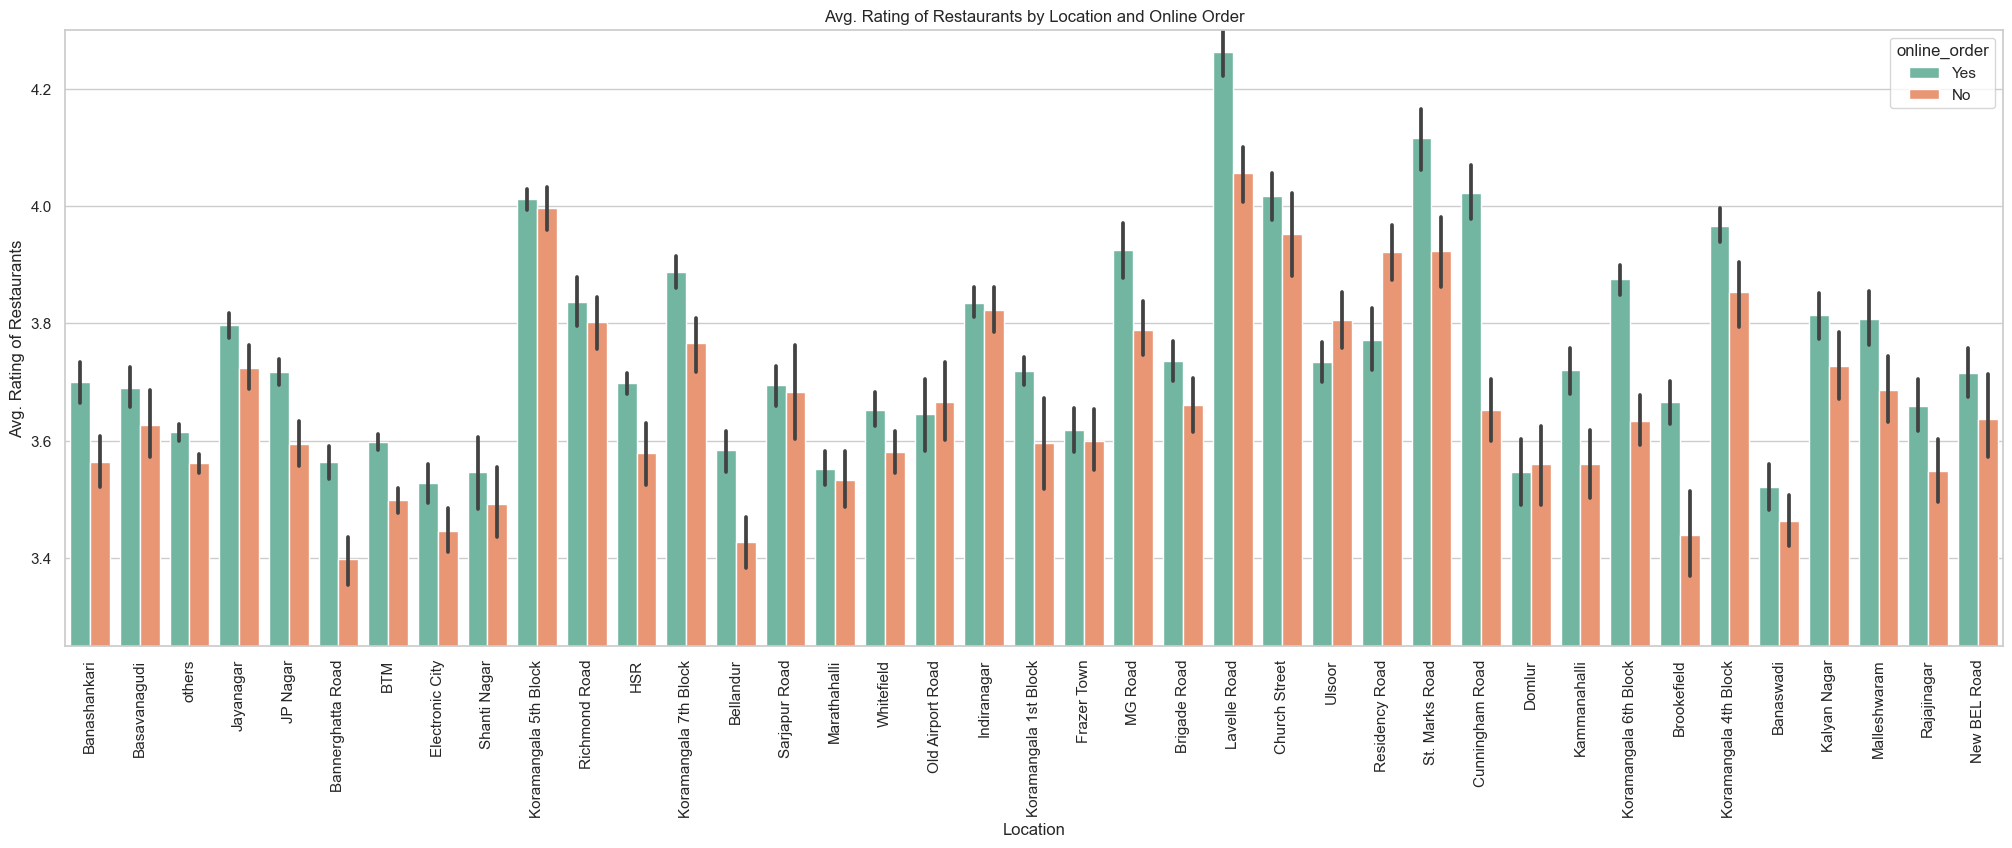

In [53]:
plt.figure(figsize = (25, 8))
ax=sns.barplot(x = 'location', y = 'rate',hue='online_order', data = df,palette='Set2')

plt.title("Avg. Rating of Restaurants by Location and Online Order")
plt.xlabel("Location")
plt.ylabel("Avg. Rating of Restaurants")
plt.xticks(rotation = 90)
ax.set_ylim(3.25, 4.3)
plt.show()

## 13) hist plot for rating

We can see that the ratings follows a approx. normal distribution. So we can apply many statistical properties on this column.

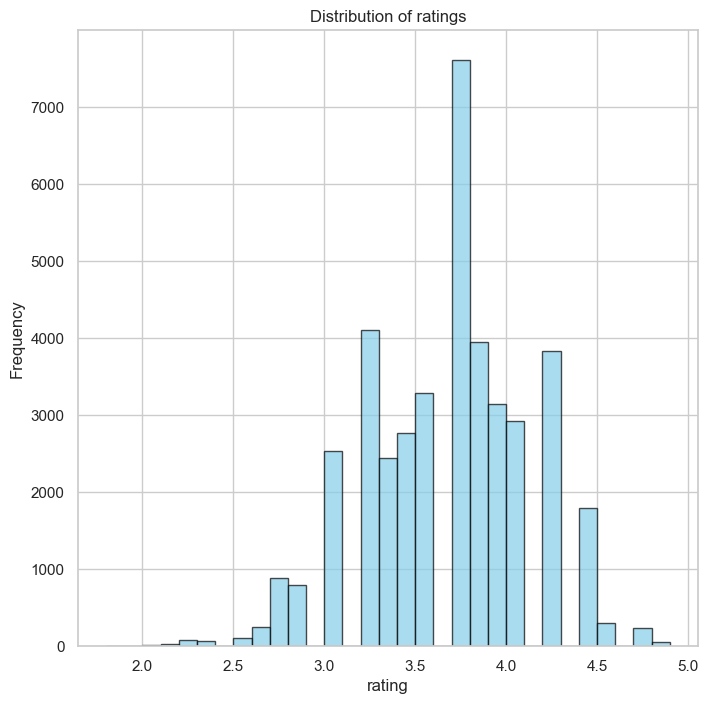

In [54]:
plt.figure(figsize=(8, 8))
plt.hist(df['rate'], bins=df['rate'].nunique(), color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of ratings")
plt.xlabel("rating")
plt.ylabel("Frequency")

# Show the plot
plt.show()

## 14) Treemap of number of restaurants in each location

Treemap shows the number of restaurants in each location. The area of the plot is directly coorelated to the number restaurants in that area. BTM has the most number of restaurants.

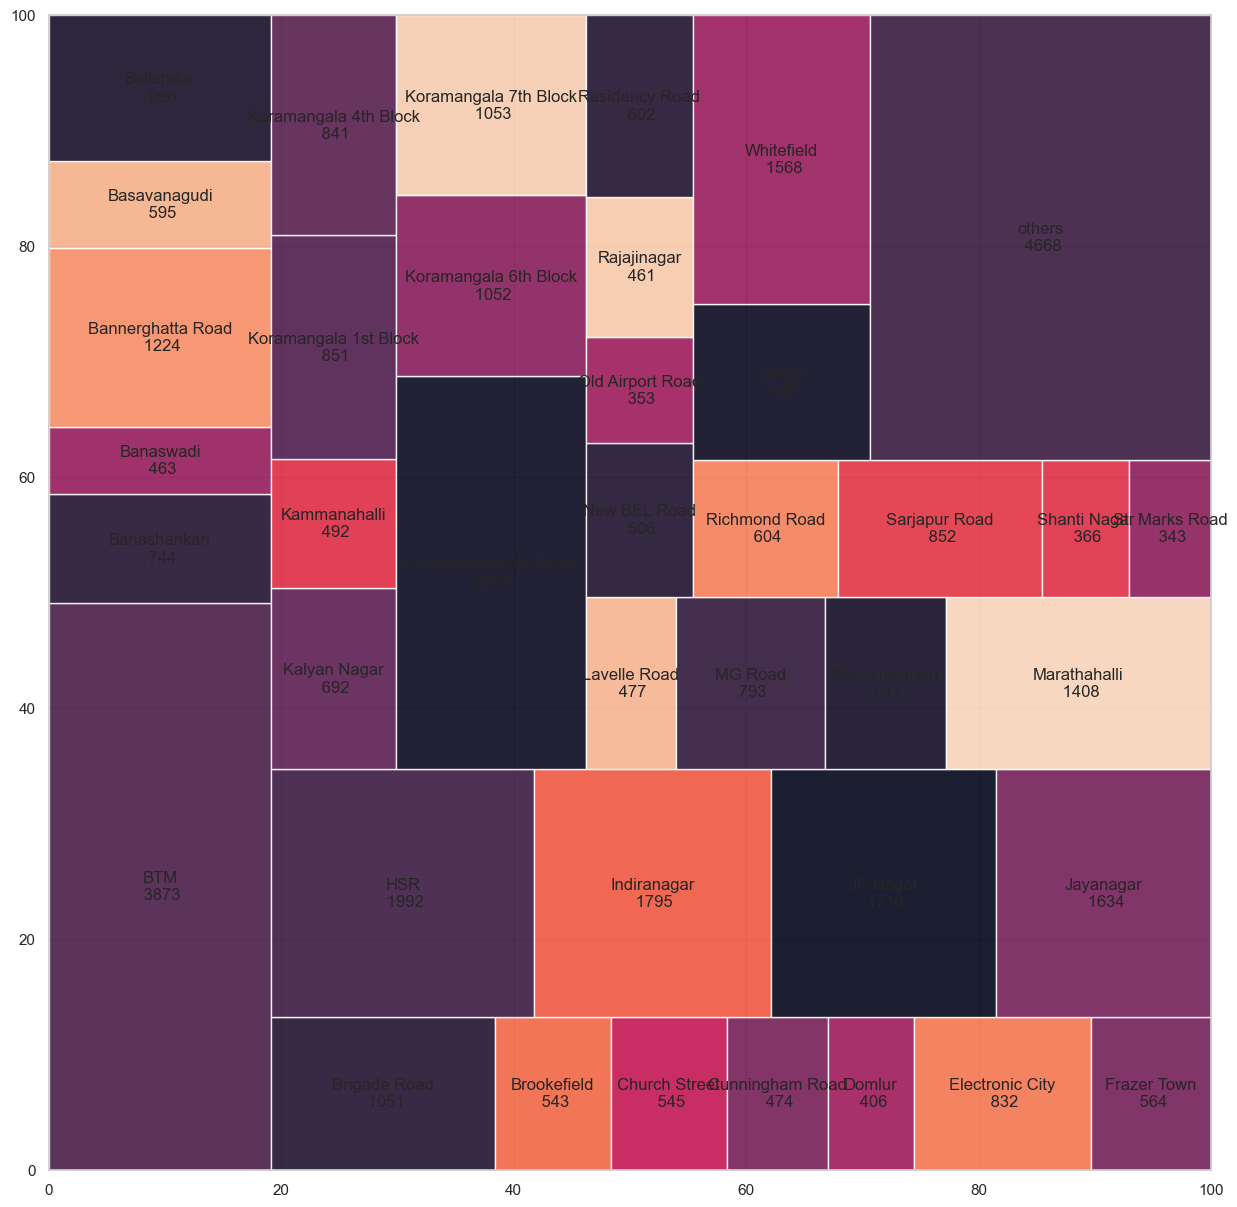

In [55]:

count_of_rest_in_location =df.groupby('location')[['name']].count().reset_index().name.values.tolist()

list_of_locations=df.groupby('location')[['name']].count().index.tolist()

list_label=[location+"\n "+str(count_of_rest) for location,count_of_rest in zip(list_of_locations,count_of_rest_in_location)]


plt.figure(figsize=(15, 15))
squarify.plot(sizes=count_of_rest_in_location, label=list_label, alpha=.9)
plt.show()

In [56]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city,no_of_items
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari,0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet,Banashankari,0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari,0


# predicion

## prep for prediction

In [57]:
# df.online_order.replace(("Yes", "No"), (True, False), inplace=True)
# df.book_table.replace(("Yes", "No"), (True, False), inplace=True)

In [58]:
df.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city,no_of_items
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari,0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet,Banashankari,0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari,0
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet,Banashankari,0
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,others,Casual Dining,others,800.0,Buffet,Banashankari,0
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe",others,600.0,Cafes,Banashankari,0
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,others,700.0,Cafes,Banashankari,0
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,others,550.0,Cafes,Banashankari,0


In [59]:
dummy=df.copy()
dummy.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city,no_of_items
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari,0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet,Banashankari,0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari,0


In [60]:
df.name = df.name.apply(lambda x: x.title())
df.online_order.replace(("Yes", "No"), (True, False), inplace=True)
df.book_table.replace(("Yes", "No"), (True, False), inplace=True)

In [61]:
for x in list(df['city'].unique()):
    print(f'<option value="{x}">{x}</option>')

<option value="Banashankari">Banashankari</option>
<option value="Bannerghatta Road">Bannerghatta Road</option>
<option value="Basavanagudi">Basavanagudi</option>
<option value="Bellandur">Bellandur</option>
<option value="Brigade Road">Brigade Road</option>
<option value="Brookefield">Brookefield</option>
<option value="BTM">BTM</option>
<option value="Church Street">Church Street</option>
<option value="Electronic City">Electronic City</option>
<option value="Frazer Town">Frazer Town</option>
<option value="HSR">HSR</option>
<option value="Indiranagar">Indiranagar</option>
<option value="Jayanagar">Jayanagar</option>
<option value="JP Nagar">JP Nagar</option>
<option value="Kalyan Nagar">Kalyan Nagar</option>
<option value="Kammanahalli">Kammanahalli</option>
<option value="Koramangala 4th Block">Koramangala 4th Block</option>
<option value="Koramangala 5th Block">Koramangala 5th Block</option>
<option value="Koramangala 6th Block">Koramangala 6th Block</option>
<option value="Korama

In [62]:
# Encode the input Variables
def Encode(dummy_df):
    for column in dummy_df.columns[~dummy_df.columns.isin(["rate", "cost", "votes"])]:
        dummy_df[column] = dummy_df[column].factorize()[0]
    return dummy_df


zomato_en = Encode(df.copy())
df_altered = zomato_en.copy()
df_altered.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city,no_of_items
0,0,0,0,4.1,775,0,0,0,800.0,0,0,0
1,1,0,1,4.1,787,0,0,0,800.0,0,0,0
2,2,0,1,3.8,918,0,1,0,800.0,0,0,0
3,3,1,1,3.7,88,0,2,1,300.0,0,0,0
4,4,1,1,3.8,166,1,0,0,600.0,0,0,0


#### models

### make a correltion matrix and explain why these features

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'type', 'city', 'no_of_items'],
      dtype='object')

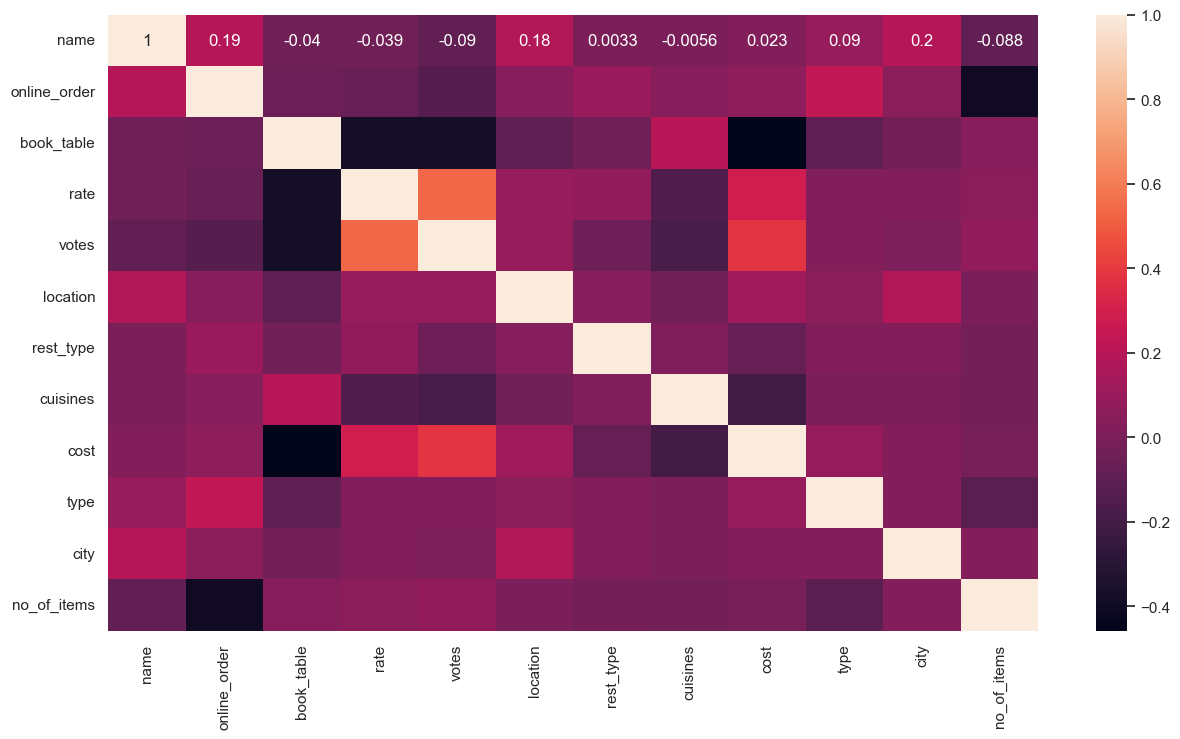

In [63]:
# Get Correlation between different variables
corr = df_altered.corr(method="kendall")
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)
df_altered.columns

explain the coorelation

In [64]:
from sklearn.model_selection import train_test_split


x = df_altered.iloc[:, [1,2, 4,5, 6, 7, 8, 9,10, 11]]
y = df_altered["rate"]
# Getting Test and Training Set
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=353
)
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,type,city,no_of_items
1911,1,1,521,4,4,0,550.0,3,1,0
32214,1,1,139,9,4,4,800.0,1,18,0
8129,1,1,5,16,2,0,300.0,4,5,0
9161,0,1,283,11,2,25,400.0,2,6,0
38835,1,0,36,22,0,0,1500.0,4,20,0


In [65]:
x_test['location'].unique()

array([ 1, 18, 14,  2, 37, 36,  6, 22, 16, 10,  7,  8, 13, 26, 24, 11, 28,
        5, 34,  0, 35,  4, 20, 31, 30,  3, 15, 32, 17, 25,  9, 12, 33, 19,
       38, 21, 29, 27, 23], dtype=int64)

In [66]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error


def evaluate_regression(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    print(f"R2 Score: {r2:.2f}")
    print(f"MSE: {MSE:.2f}")
    print(f"MAE: {MAE:.2f}")


def store_regression(model_name, y_test, y_pred):
    metrics = {
        "Model Name": model_name,
        "R^2 Score": round(r2_score(y_test, y_pred), 2),
        "RMSE": round(mean_squared_error(y_test, y_pred), 2),
        "MAE": round(mean_absolute_error(y_test, y_pred),2)
        # You can add more metrics here
    }
    return metrics


regression_model_metrics_list = []

In [67]:
# 1.Prepare a Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

evaluate_regression(y_test, y_pred)
regression_model_metrics_list.append(store_regression("Linear Regression Model", y_test, y_pred))

R2 Score: 0.30
MSE: 0.13
MAE: 0.28


In [68]:
# 2.LASSO REGRESSION

from sklearn.linear_model import Lasso, LassoCV

lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(x_train, y_train)
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

# metric calculation
evaluate_regression(y_test, y_pred)
regression_model_metrics_list.append(
    store_regression("LASSO REGRESSION", y_test, y_pred)
)

R2 Score: 0.26
MSE: 0.14
MAE: 0.29


Here, LassoCV is a Lasso regression model with built-in cross-validation to find the optimal value of the regularization parameter alpha.

alphas=None: This setting allows the model to automatically try a range of alpha values and find the best one.
cv=10: This specifies that 10-fold cross-validation is used. The data is split into 10 parts, with 9 parts used for training and 1 for validation in each iteration. This process helps in assessing the model's performance more robustly.
max_iter=10000: This sets the maximum number of iterations the algorithm should run for.

In [69]:
# 3.DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor


DTree = DecisionTreeRegressor(min_samples_leaf=0.0001)
DTree.fit(x_train, y_train)
y_pred = DTree.predict(x_test)

evaluate_regression(y_test, y_pred)
regression_model_metrics_list.append(
    store_regression("DecisionTreeRegressor", y_test, y_pred)
)

R2 Score: 0.78
MSE: 0.04
MAE: 0.10


In [70]:
# 4.Preparing Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

RForest = RandomForestRegressor(
    n_estimators=500, random_state=329, min_samples_leaf=0.0001
)
RForest.fit(x_train, y_train)
y_pred = RForest.predict(x_test)

evaluate_regression(y_test, y_pred)
regression_model_metrics_list.append(
    store_regression("Random Forest Regression", y_test, y_pred)
)

R2 Score: 0.85
MSE: 0.03
MAE: 0.10


In [71]:
# 5.Preparing Extra Tree Regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

ETree = ExtraTreesRegressor(n_estimators=100)
ETree.fit(x_train, y_train)
y_pred = ETree.predict(x_test)
print(x_train.head())

evaluate_regression(y_test, y_pred)
regression_model_metrics_list.append(
    store_regression("Extra Tree Regression", y_test, y_pred)
)

       online_order  book_table  votes  location  rest_type  cuisines    cost   
1911              1           1    521         4          4         0   550.0  \
32214             1           1    139         9          4         4   800.0   
8129              1           1      5        16          2         0   300.0   
9161              0           1    283        11          2        25   400.0   
38835             1           0     36        22          0         0  1500.0   

       type  city  no_of_items  
1911      3     1            0  
32214     1    18            0  
8129      4     5            0  
9161      2     6            0  
38835     4    20            0  
R2 Score: 0.92
MSE: 0.01
MAE: 0.05


In [72]:
# 6.GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate=0.1)
gbr.fit(x_train, y_train)

y_pred = gbr.predict(x_test)


evaluate_regression(y_test, y_pred)
regression_model_metrics_list.append(
    store_regression("GradientBoostingRegressor", y_test, y_pred)
)

R2 Score: 0.52
MSE: 0.09
MAE: 0.22


In [73]:
x_train.describe()

,online_order,book_table,votes,location,rest_type,cuisines,cost,type,city,no_of_items
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,0.342142,0.847158,352.804471,14.189785,5.603279,10.018552,603.678837,2.809406,14.446527,34.270683
std,0.474433,0.359840,889.740556,10.717745,7.190981,16.075847,464.015170,1.167554,7.981309,74.507751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,5.000000,2.000000,0.000000,300.000000,2.000000,7.000000,0.000000
50%,0.000000,1.000000,74.000000,12.000000,2.000000,0.000000,500.000000,2.000000,15.000000,0.000000
75%,1.000000,1.000000,275.000000,22.000000,8.000000,15.000000,750.000000,4.000000,20.000000,12.000000
max,1.000000,1.000000,16832.000000,38.000000,31.000000,61.000000,6000.000000,6.000000,29.000000,452.000000


In [74]:
# 7.XGBRegressor

from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

xgb = XGBRegressor(booster="gbtree", learning_rate=0.1, max_depth=7, n_estimators=200)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

evaluate_regression(y_test, y_pred)
regression_model_metrics_list.append(store_regression("XGBRegressor", y_test, y_pred))

R2 Score: 0.73
MSE: 0.05
MAE: 0.16


## Regression results

In [75]:
pd.DataFrame(regression_model_metrics_list)

,Model Name,R^2 Score,RMSE,MAE
0,Linear Regression Model,0.30,0.13,0.28
1,LASSO REGRESSION,0.26,0.14,0.29
2,DecisionTreeRegressor,0.78,0.04,0.10
3,Random Forest Regression,0.85,0.03,0.10
4,Extra Tree Regression,0.92,0.01,0.05
5,GradientBoostingRegressor,0.52,0.09,0.22
6,XGBRegressor,0.73,0.05,0.16


### Classification

In [76]:
# Features and Target
X = df_altered.drop("online_order", axis=1)
y = df_altered["online_order"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [78]:
print(X_test.info())
print(X_test.columns)
print(X_test.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 8241 entries, 18690 to 21659
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         8241 non-null   int64  
 1   book_table   8241 non-null   int64  
 2   rate         8241 non-null   float64
 3   votes        8241 non-null   int64  
 4   location     8241 non-null   int64  
 5   rest_type    8241 non-null   int64  
 6   cuisines     8241 non-null   int64  
 7   cost         8241 non-null   float64
 8   type         8241 non-null   int64  
 9   city         8241 non-null   int64  
 10  no_of_items  8241 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 772.6 KB
None
Index(['name', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'cuisines', 'cost', 'type', 'city', 'no_of_items'],
      dtype='object')
(8241, 11)


In [79]:
# 1) Initialize the model
from sklearn.ensemble import RandomForestClassifier


modelRFC = RandomForestClassifier(random_state=42)

# Train the model
modelRFC.fit(X_train, y_train)

# Make predictions
y_pred = modelRFC.predict(X_test)

In [80]:
X_test.iloc[0]

name             81.0
book_table        0.0
rate              4.2
votes          1745.0
location         18.0
rest_type         0.0
cuisines          0.0
cost            750.0
type              4.0
city             11.0
no_of_items     241.0
Name: 18690, dtype: float64

In [81]:
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,
    confusion_matrix,roc_auc_score,roc_curve,classification_report,precision_recall_curve,average_precision_score,)
import numpy as np
import matplotlib.pyplot as plt


def store_classification(model_name,y_test, y_pred, y_score):
    metrics = {"Model Name": model_name,
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average="binary"),
    "Recall": recall_score(y_test, y_pred, average="binary"),
    "F1 Score": f1_score(y_test, y_pred, average="binary"),
    "Confusion Matrix": confusion_matrix(y_test, y_pred),
    "Classification Report": classification_report(y_test, y_pred),}
    return metrics

classification_metric_list=[]

def evaluate_classification(y_test, y_pred, y_score):
    #  metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary")
    recall = recall_score(y_test, y_pred, average="binary")
    f1 = f1_score(y_test, y_pred, average="binary")
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

    roc_auc = roc_auc_score(y_test, y_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    print(f"ROC-AUC Score: {roc_auc:.2f}")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve and Average Precision Score
    average_precision = average_precision_score(y_test, y_score)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_score)

    plt.figure(figsize=(8, 6))
    plt.plot(
        recall_curve,
        precision_curve,
        label=f"Precision-Recall curve (area = {average_precision:.2f})",
    )
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="lower left")
    plt.show()

    print(f"Average Precision-Recall Score: {average_precision:.2f}")

Accuracy: 0.94
Precision: 0.92
Recall: 0.91
F1 Score: 0.91
Confusion Matrix:
[[5233  218]
 [ 257 2533]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5451
           1       0.92      0.91      0.91      2790

    accuracy                           0.94      8241
   macro avg       0.94      0.93      0.94      8241
weighted avg       0.94      0.94      0.94      8241

ROC-AUC Score: 0.98


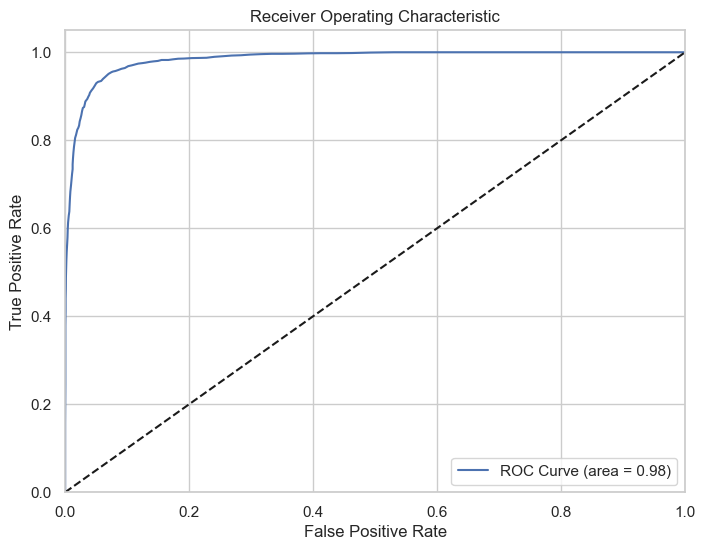

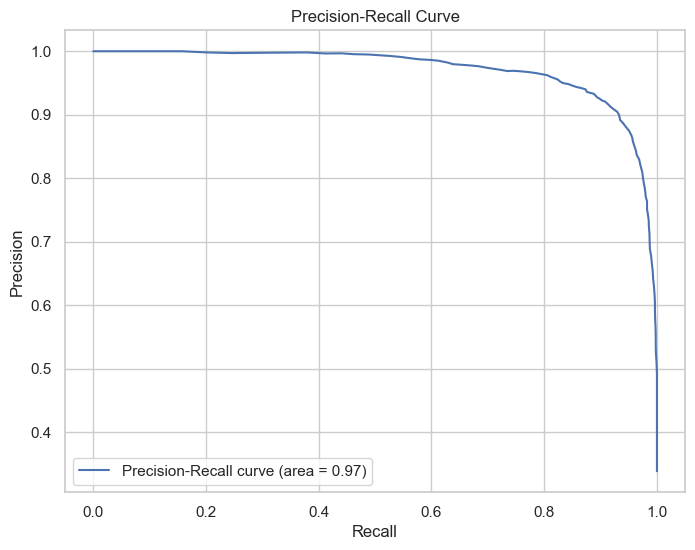

Average Precision-Recall Score: 0.97


In [82]:
evaluate_classification(y_test, y_pred, modelRFC.predict_proba(X_test)[:, 1])
classification_metric_list.append(store_classification(
    "RandomForestClassifier", y_test, y_pred, modelRFC.predict_proba(X_test)[:, 1]
))

In [83]:
# 2 Initialize the Logistic Regression model
from sklearn.linear_model import LogisticRegression


log_reg_model = LogisticRegression(max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

Accuracy: 0.75
Precision: 0.66
Recall: 0.55
F1 Score: 0.60
Confusion Matrix:
[[4652  799]
 [1253 1537]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      5451
           1       0.66      0.55      0.60      2790

    accuracy                           0.75      8241
   macro avg       0.72      0.70      0.71      8241
weighted avg       0.74      0.75      0.74      8241

ROC-AUC Score: 0.83


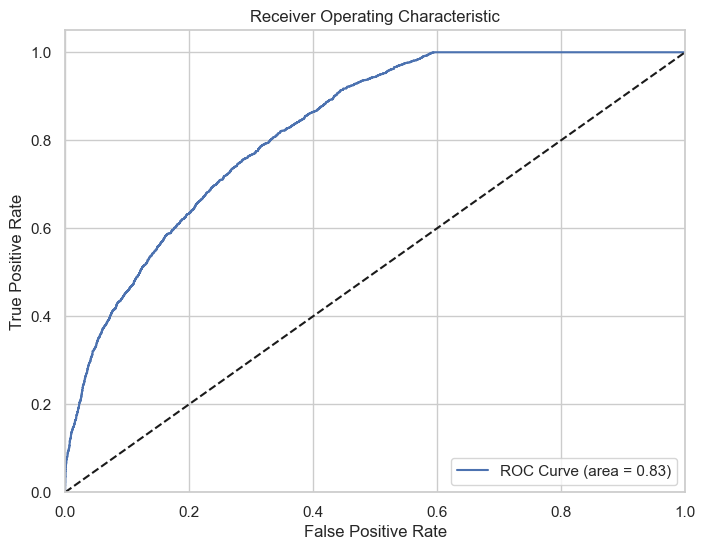

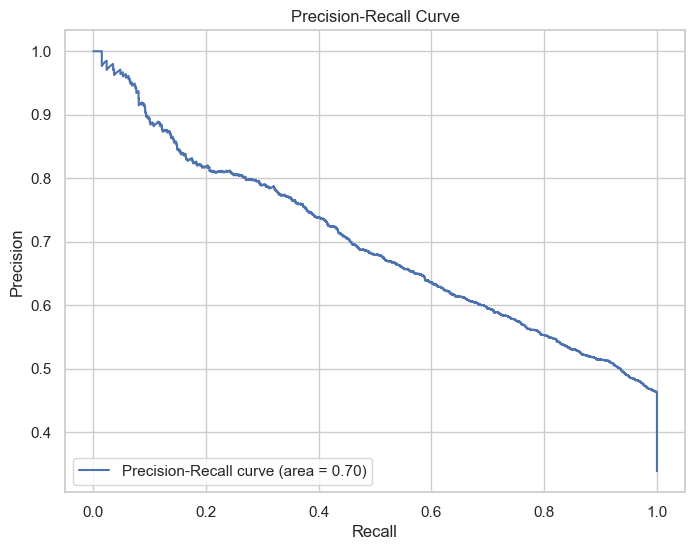

Average Precision-Recall Score: 0.70


In [84]:
evaluate_classification(y_test, y_pred, log_reg_model.decision_function(X_test))
classification_metric_list.append(
    store_classification(
        "Logistic Regression model",
        y_test,
        y_pred,
        log_reg_model.decision_function(X_test),
    )
)

Accuracy: 0.72
Precision: 0.65
Recall: 0.35
F1 Score: 0.46
Confusion Matrix:
[[4912  539]
 [1809  981]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      5451
           1       0.65      0.35      0.46      2790

    accuracy                           0.72      8241
   macro avg       0.69      0.63      0.63      8241
weighted avg       0.70      0.72      0.69      8241

ROC-AUC Score: 0.79


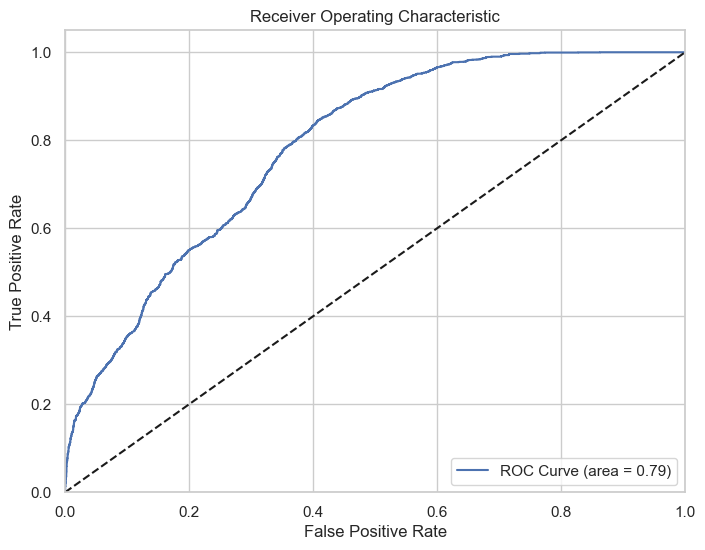

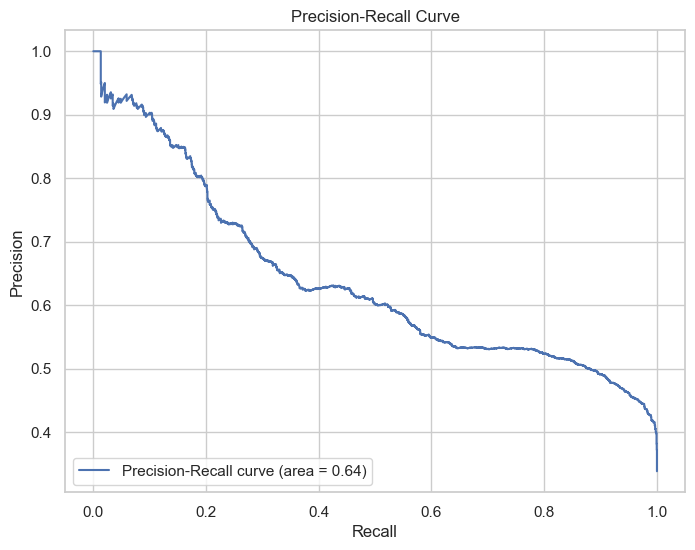

Average Precision-Recall Score: 0.64


In [85]:
from sklearn.svm import SVC


svm_clf = SVC(kernel="rbf", probability=True, random_state=42)
# Train the classifier
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)
#print(svm_clf.predict_proba(X_test))
evaluate_classification(y_test, y_pred, svm_clf.predict_proba(X_test)[:, 1])
classification_metric_list.append(
    store_classification(
        "SVC",
        y_test,
        y_pred,
        svm_clf.predict_proba(X_test)[:, 1],
    )
)

Accuracy: 0.85
Precision: 0.79
Recall: 0.76
F1 Score: 0.78
Confusion Matrix:
[[4903  548]
 [ 676 2114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5451
           1       0.79      0.76      0.78      2790

    accuracy                           0.85      8241
   macro avg       0.84      0.83      0.83      8241
weighted avg       0.85      0.85      0.85      8241

ROC-AUC Score: 0.93


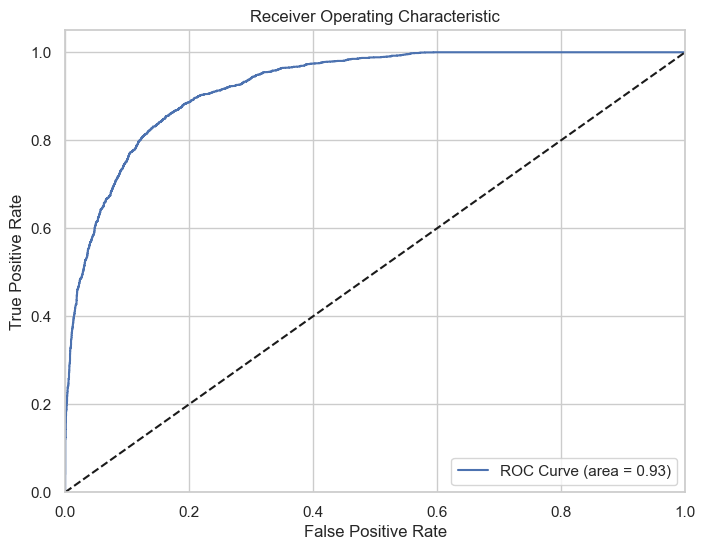

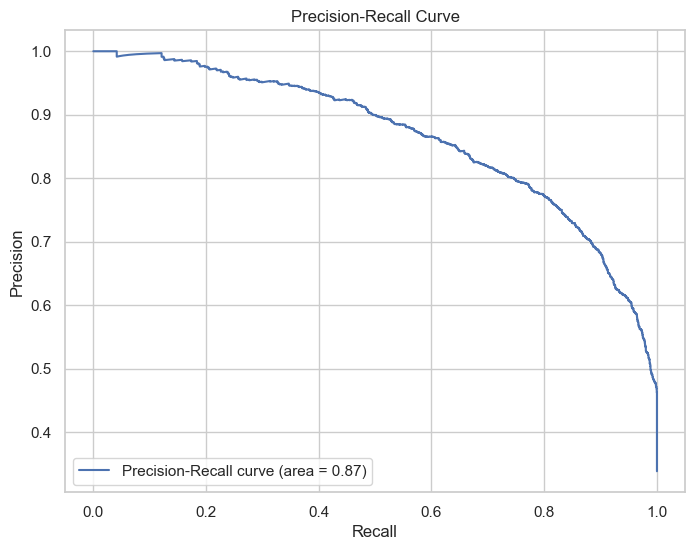

Average Precision-Recall Score: 0.87


In [86]:
# Initialize the GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier


gbm_clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)

# Train the GBM model
gbm_clf.fit(X_train, y_train)

# Make predictions
y_pred = gbm_clf.predict(X_test)
evaluate_classification(y_test, y_pred, gbm_clf.predict_proba(X_test)[:, 1])

classification_metric_list.append(
    store_classification(
        "GradientBoostingClassifier",
        y_test,
        y_pred,
        gbm_clf.predict_proba(X_test)[:, 1],
    )
)

In [87]:
pd.DataFrame(classification_metric_list)

,Model Name,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,Classification Report
0,RandomForestClassifier,0.942361,0.920756,0.907885,0.914275,"[[5233, 218], [257, 2533]]",precision recall f1-score ...
1,Logistic Regression model,0.751001,0.657962,0.550896,0.599688,"[[4652, 799], [1253, 1537]]",precision recall f1-score ...
2,SVC,0.715083,0.645395,0.351613,0.455220,"[[4912, 539], [1809, 981]]",precision recall f1-score ...
3,GradientBoostingClassifier,0.851474,0.794140,0.757706,0.775495,"[[4903, 548], [676, 2114]]",precision recall f1-score ...


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical



In [89]:
# Define the neural network model
model = Sequential()
model.add(
    Dense(64, input_dim=X_train.shape[1], activation="relu")
)  # Input layer and first hidden layer
model.add(Dense(32, activation="relu"))  # Second hidden layer
model.add(Dense(1, activation="sigmoid"))  # Output layer for binary classification

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Make predictions (probabilities -- the output of the last layer)
# For binary classification, the output layer with a sigmoid activation function will output probabilities of the positive class
y_pred_proba = model.predict(X_test).flatten()

# Convert probabilities to binary predictions
y_pred = (y_pred_proba >= 0.5).astype(int)



Epoch 1/50
3297/3297 [==============================] - 4s 902us/step - loss: 3.8039 - accuracy: 0.6603
Epoch 2/50
3297/3297 [==============================] - 3s 883us/step - loss: 2.1050 - accuracy: 0.6822
Epoch 3/50
3297/3297 [==============================] - 3s 803us/step - loss: 1.3207 - accuracy: 0.6920
Epoch 4/50
3297/3297 [==============================] - 3s 803us/step - loss: 0.9735 - accuracy: 0.6969
Epoch 5/50
3297/3297 [==============================] - 3s 805us/step - loss: 0.7229 - accuracy: 0.7092
Epoch 6/50
3297/3297 [==============================] - 3s 766us/step - loss: 0.5849 - accuracy: 0.7202
Epoch 7/50
3297/3297 [==============================] - 3s 764us/step - loss: 0.5294 - accuracy: 0.7295
Epoch 8/50
3297/3297 [==============================] - 3s 816us/step - loss: 0.4921 - accuracy: 0.7362
Epoch 9/50
3297/3297 [==============================] - 3s 824us/step - loss: 0.4715 - accuracy: 0.7422
Epoch 10/50
3297/3297 [==============================] - 3s 760u

Accuracy: 0.78
Precision: 0.68
Recall: 0.63
F1 Score: 0.65
Confusion Matrix:
[[4636  815]
 [1039 1751]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      5451
           1       0.68      0.63      0.65      2790

    accuracy                           0.78      8241
   macro avg       0.75      0.74      0.74      8241
weighted avg       0.77      0.78      0.77      8241



ROC-AUC Score: 0.85


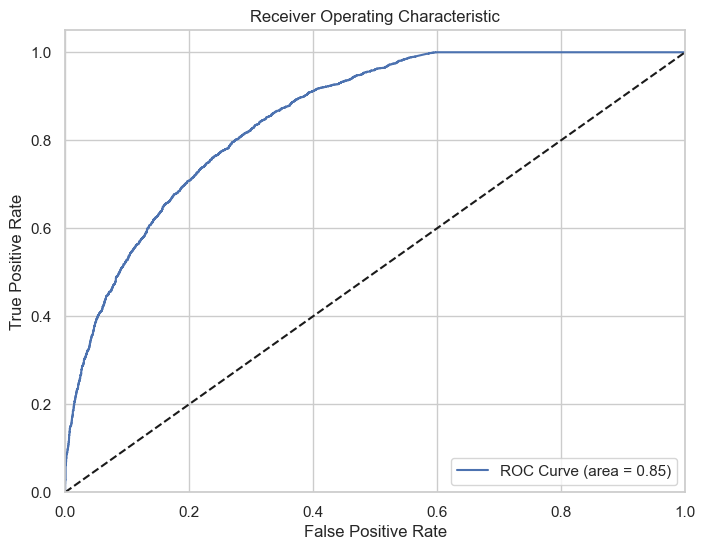

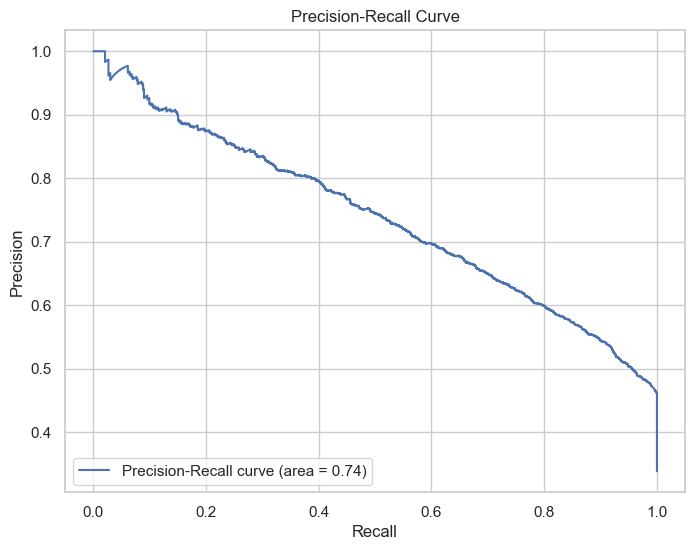

Average Precision-Recall Score: 0.74


In [90]:
evaluate_classification(y_test, y_pred, y_pred_proba)
classification_metric_list.append(
    store_classification(
        "neural network model",
        y_test,
        y_pred,
        y_pred_proba,
    )
)

Accuracy: 0.61
Precision: 0.46
Recall: 1.00
F1 Score: 0.63
Confusion Matrix:
[[2202 3249]
 [   0 2790]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.58      5451
           1       0.46      1.00      0.63      2790

    accuracy                           0.61      8241
   macro avg       0.73      0.70      0.60      8241
weighted avg       0.82      0.61      0.59      8241

ROC-AUC Score: 0.81


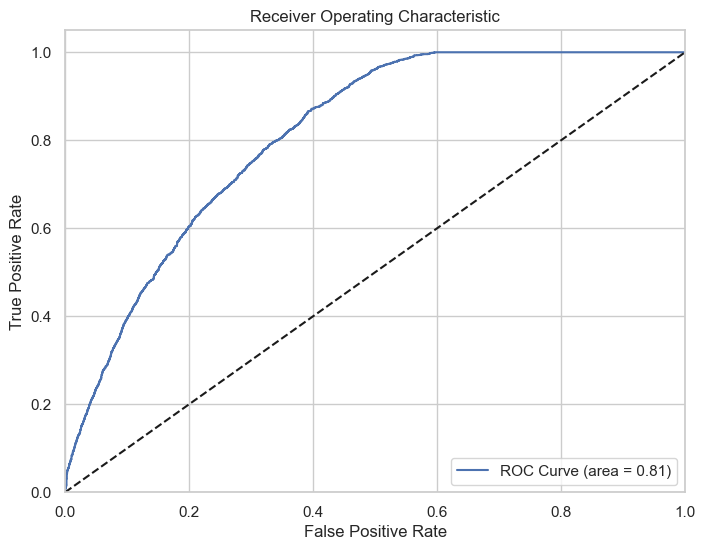

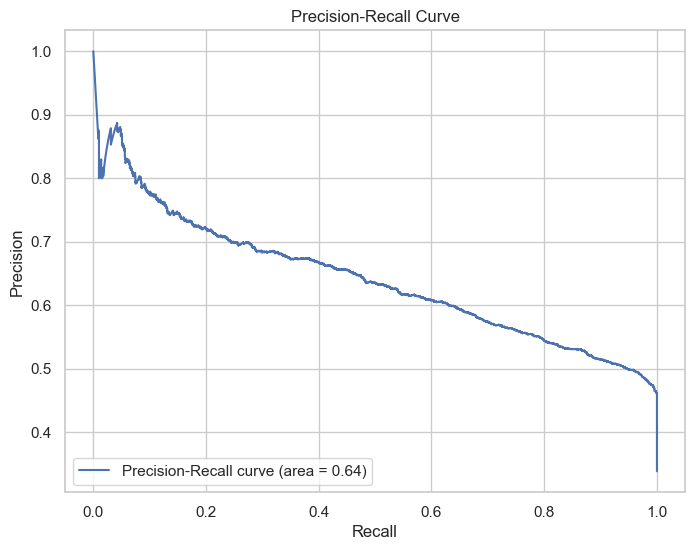

Average Precision-Recall Score: 0.64


In [91]:
from sklearn.naive_bayes import GaussianNB


gnb_clf = GaussianNB()

# Train the classifier
gnb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gnb_clf.predict(X_test)
y_pred_proba = gnb_clf.predict_proba(X_test)[:, 1]

evaluate_classification(y_test, y_pred, y_pred_proba)
classification_metric_list.append(
    store_classification(
        "GaussianNB model",
        y_test,
        y_pred,
        y_pred_proba,
    )
)

In [92]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city,no_of_items
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari,0
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari,0
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet,Banashankari,0
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari,0
...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar N Grill,False,False,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,Pubs and bars,Whitefield,0
51711,Bhagini,False,False,2.5,81,Whitefield,"Casual Dining, Bar",others,800.0,Pubs and bars,Whitefield,0
51712,Best Brews - Four Points By Sheraton Bengaluru...,False,False,3.6,27,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield,0
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,others,Bar,Finger Food,2500.0,Pubs and bars,Whitefield,0


In [93]:
pd.DataFrame(classification_metric_list)

,Model Name,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,Classification Report
0,RandomForestClassifier,0.942361,0.920756,0.907885,0.914275,"[[5233, 218], [257, 2533]]",precision recall f1-score ...
1,Logistic Regression model,0.751001,0.657962,0.550896,0.599688,"[[4652, 799], [1253, 1537]]",precision recall f1-score ...
2,SVC,0.715083,0.645395,0.351613,0.455220,"[[4912, 539], [1809, 981]]",precision recall f1-score ...
3,GradientBoostingClassifier,0.851474,0.794140,0.757706,0.775495,"[[4903, 548], [676, 2114]]",precision recall f1-score ...
4,neural network model,0.775027,0.682385,0.627599,0.653846,"[[4636, 815], [1039, 1751]]",precision recall f1-score ...
5,GaussianNB model,0.605752,0.461997,1.000000,0.632008,"[[2202, 3249], [0, 2790]]",precision recall f1-score ...


In [94]:
for column in df.columns:
    unique_elements = df[column].unique()
    print(f'Unique elements in {column}: {unique_elements}')

Unique elements in name: ['Jalsa' 'Spice Elephant' 'San Churro Cafe' ...
 'The Nest - The Den Bengaluru' 'Nawabs Empire' 'Seeya Restaurant']
Unique elements in online_order: [ True False]
Unique elements in book_table: [ True False]
Unique elements in rate: [4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 2.9 3.5 2.6
 3.4 4.5 2.5 2.7 4.7 2.4 2.2 2.3 4.8 4.9 2.1 2.  1.8]
Unique elements in votes: [ 775  787  918 ... 4957 2382  843]
Unique elements in location: ['Banashankari' 'Basavanagudi' 'others' 'Jayanagar' 'JP Nagar'
 'Bannerghatta Road' 'BTM' 'Electronic City' 'Shanti Nagar'
 'Koramangala 5th Block' 'Richmond Road' 'HSR' 'Koramangala 7th Block'
 'Bellandur' 'Sarjapur Road' 'Marathahalli' 'Whitefield'
 'Old Airport Road' 'Indiranagar' 'Koramangala 1st Block' 'Frazer Town'
 'MG Road' 'Brigade Road' 'Lavelle Road' 'Church Street' 'Ulsoor'
 'Residency Road' 'St. Marks Road' 'Cunningham Road' 'Domlur'
 'Kammanahalli' 'Koramangala 6th Block' 'Brookefield'
 'Koramangala 4th B

In [95]:
import pickle

# Assuming `online_order_model` and `rating_model` are your trained models
pickle.dump(modelRFC, open("online_order_model.pkl", "wb"))
pickle.dump(ETree, open("rating_model.pkl", "wb"))


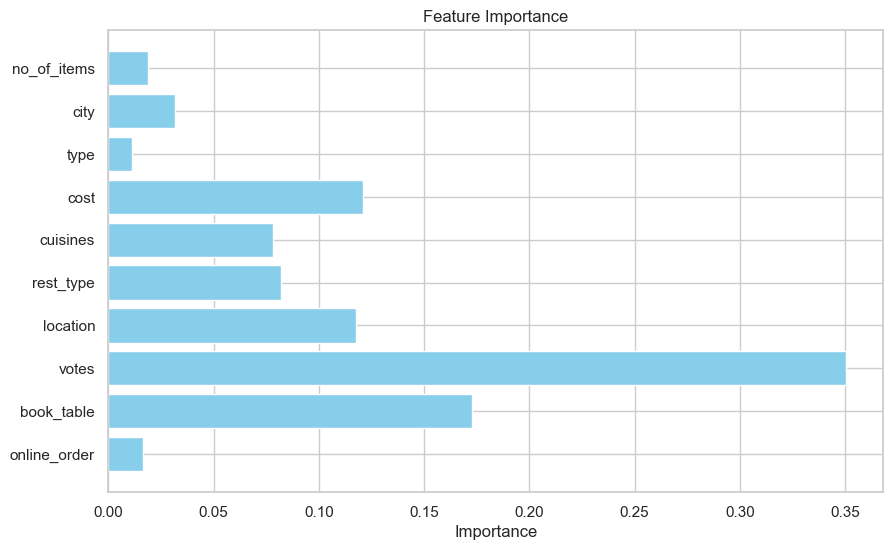

In [96]:
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from flask import Flask, render_template, request
import pickle

rating_model = pickle.load(open("rating_model.pkl", "rb"))
online_order_model = pickle.load(open("online_order_model.pkl", "rb"))

def create_feature_importance_chart(model):
    plt.figure(figsize=(10, 6))
    features = ['online_order', 'book_table', 'votes', 'location', 'rest_type' ,'cuisines','cost','type','city','no_of_items']  # Replace with actual features
    importances = model.feature_importances_
    plt.barh(features, importances, color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    img = BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)
    plot_url = base64.b64encode(img.getvalue()).decode()
    return plot_url

feature_importance_plot = create_feature_importance_chart(rating_model)

In [97]:
import os

def create_feature_importance_chart(model,features):
    plt.figure(figsize=(10, 6))
    features = features
    importances = model.feature_importances_
    plt.barh(features, importances, color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    filename = 'feature_importance.png'
    filepath = os.path.join('static', filename)
    plt.savefig(filepath)
    plt.close()  # Close the plot to release memory
    return filename

features = ['online_order', 'book_table', 'votes', 'location', 'rest_type', 'cuisines', 'cost', 'type', 'city', 'no_of_items']
feature_importance_plot = create_feature_importance_chart(rating_model,features)

features = ['name', 'book_table', 'rate', 'votes', 'location', 'rest_type', 'cuisines', 'cost', 'type', 'city', 'no_of_items']
feature_importance_plot = create_feature_importance_chart(online_order_model,features)